# Análsis de cantidad de accesos y velocidades de conexión

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'Datasets/Accesos por rangos.csv')

In [5]:
df.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


In [6]:
df.shape

(1000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


In [8]:
#Cuento los valores nulos por columna
conteo_nulos = df.isnull().sum()
print(conteo_nulos)

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64


In [9]:
#Veo las filas en las que se encuentran los valores nulos:
valores_nulos = df.loc[df.isnull().any(axis=1)] 
valores_nulos

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
481,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
491,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
492,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
499,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
502,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
503,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


In [3]:
#Practicamente no hay valores nulos y como pertencen a la columna OTROS y del año 2019, los reemplazo por 0.
df = df.fillna(0)

In [11]:
#Busco valores duplicados y no hay.
duplicados = df[df.duplicated()]
duplicados

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total


In [12]:
df.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,2018.824000,2.464000,1953.317000,8864.257000,1.327725e+05,38408.510000,37138.329000,20091.330000,1.222098e+05,6471.405000,3.679094e+05
std,3.058493,1.114426,12676.575806,20312.520997,3.222569e+05,64156.365883,88290.744464,69299.281156,4.657500e+05,15306.585098,7.899348e+05
min,2014.000000,1.000000,6.000000,0.000000,1.124000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,43.250000,389.750000,2.381250e+04,3876.750000,2706.750000,43.750000,1.500000e+01,0.000000,6.234225e+04
50%,2019.000000,2.000000,107.000000,2061.000000,4.213250e+04,13932.000000,10503.000000,1658.000000,4.253500e+03,296.500000,1.136205e+05
75%,2021.000000,3.000000,466.250000,6851.500000,8.371025e+04,42593.500000,26463.750000,10109.250000,4.339925e+04,6800.750000,1.969198e+05
max,2024.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125547.000000,5.044557e+06


In [20]:
#Corroboro que no haya un número de trimestre raro
print(df["Trimestre"].unique())

[2 1 4 3]


In [21]:
#Chequeo qué años contiene el df
print(df["Año"].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


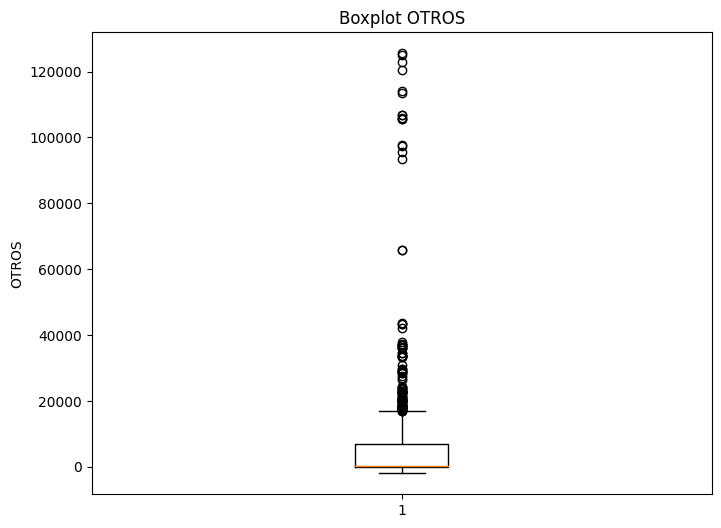

In [15]:
#Hay un valor negativo en 'OTROS'. Busco mas y otros outliers por medio de un boxplot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['OTROS'])

plt.title('Boxplot OTROS')
plt.ylabel('OTROS')

plt.show()

In [17]:
#Busco los valores negativos ya que, evidentemente está o están fuera del rango del gráfico
outliers_negativos = df.loc[df['OTROS'] < 0]
outliers_negativos

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
323,2021,1,La Rioja,18.0,1.0,36749.0,5968.0,4604.0,215.0,5074.0,-1.0,52628.0
331,2021,1,Santa Cruz,50.0,0.0,30655.0,8334.0,6987.0,1337.0,647.0,-1945.0,46065.0


In [4]:
#Al valor -1 de La Rioja lo paso a 1 ya que pertence a la columna OTROS (rango muy generalista).
df.loc[df['OTROS'] == -1, 'OTROS'] = 1

In [5]:
#La velocidad de conexion promedio en Santa Cruz es apenas cercana a 20, por lo que un valor negativo y tan alto no es normal. 
#Supongo que es un error de tipeo. Lo dejo en 0. 
df['OTROS'] = df['OTROS'].replace(-1945, 0)

In [6]:
#Con respecto a los outliers positivos de la columna 'OTROS', borraré los superiores a 30000 conexiones, ya que son relativamete pocos:
ouliers_positivos = 30000
df = df[df['OTROS'] <= ouliers_positivos]

In [8]:
#Veo cómo quedó el describe ahora
df.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,960.000000,960.000000,960.000000,960.000000,9.600000e+02,960.000000,960.000000,960.000000,9.600000e+02,960.000000,9.600000e+02
mean,2018.737500,2.468750,1303.814583,8539.207292,1.256619e+05,35194.736458,31991.601042,15769.819792,8.070032e+04,4024.705208,3.031841e+05
std,3.058663,1.116313,7819.452523,20138.471963,3.109119e+05,58961.875868,72027.129293,54901.438679,2.906124e+05,6503.248241,6.169455e+05
min,2014.000000,1.000000,6.000000,0.000000,1.124000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.240600e+04
25%,2016.000000,1.000000,41.000000,385.750000,2.384000e+04,3774.250000,2656.000000,41.000000,1.300000e+01,0.000000,6.032250e+04
50%,2019.000000,2.000000,107.000000,2027.000000,4.202000e+04,13439.500000,10353.500000,1477.660000,3.947500e+03,84.500000,1.097050e+05
75%,2021.000000,3.000000,426.750000,6725.250000,8.212675e+04,36767.750000,25918.000000,8506.250000,3.964400e+04,6086.250000,1.814588e+05
max,2024.000000,4.000000,162513.000000,171244.480000,2.299705e+06,403575.000000,676137.000000,949093.000000,3.381049e+06,29772.000000,4.555424e+06


## Análisis Descriptivo

Agrupo accesos por año, trimestre y provincia. Esto lo usaré luego para el análisis de tendencias

In [7]:
agrupo_accesos = df.groupby(['Año', 'Trimestre', 'Provincia'])['Total'].sum().reset_index()

agrupo_accesos


,Año,Trimestre,Provincia,Total
0,2014,1,Buenos Aires,2624542.08
1,2014,1,Capital Federal,1301080.92
2,2014,1,Catamarca,24232.00
3,2014,1,Chaco,62546.00
4,2014,1,Chubut,68791.00
...,...,...,...,...
955,2024,4,San Luis,154685.00
956,2024,4,Santa Fe,909501.00
957,2024,4,Santiago Del Estero,123230.00
958,2024,4,Tierra Del Fuego,61599.00


Distribución de accesos en cada rango de velocidad

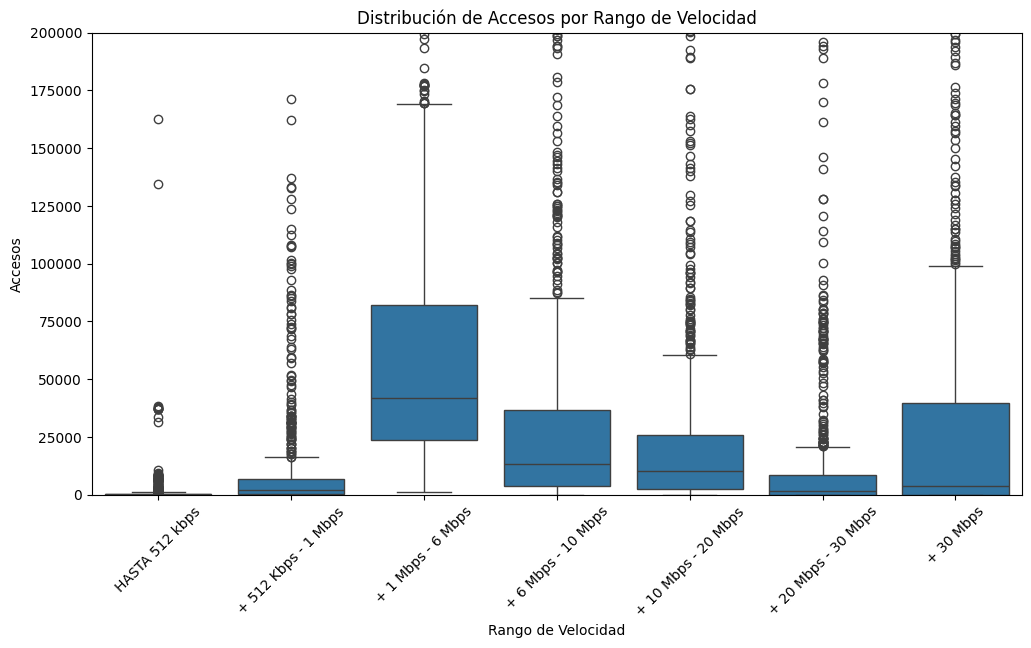

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

##Utilizo el metodo melt() para reorganizar el dataframe para la visualización
df_melted = df.melt(id_vars=['Año', 'Trimestre', 'Provincia'], value_vars=['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps'], var_name='Rango de Velocidad', value_name='Accesos')

#Elimino filas con valores nulos
df_melted = df_melted.dropna(subset=['Accesos'])

#Para visualizar la distribución de accesos por rango de velocidad
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rango de Velocidad', y='Accesos', data=df_melted)
plt.xticks(rotation=45)
plt.ylim(0, 200000)
plt.title('Distribución de Accesos por Rango de Velocidad')
plt.show()


*De este grafico podemos inferir que:* 

*El rango + 1 Mbps - 6 Mbps tiene la mayor cantidad de accesos y una alta variabilidad, lo que sugiere que este rango es el más utilizado.* 

*Los rangos HASTA 512 kbps y + 512 kbps - 1 Mbps tienen menos accesos, lo que nos da la pauta que estas velocidades son menos comunes o estan casi en desuso.*
 
*Con respecto a los outliers, sobretodo en el rango + 30 Mbps, hay varios, o sea que aunque hay pocos accesos, algunos lugares tienen acceso a velocidades muy altas.*

## Análisis de tendencias

Evolución de los accesos por rango de velocidad a lo largo de los años

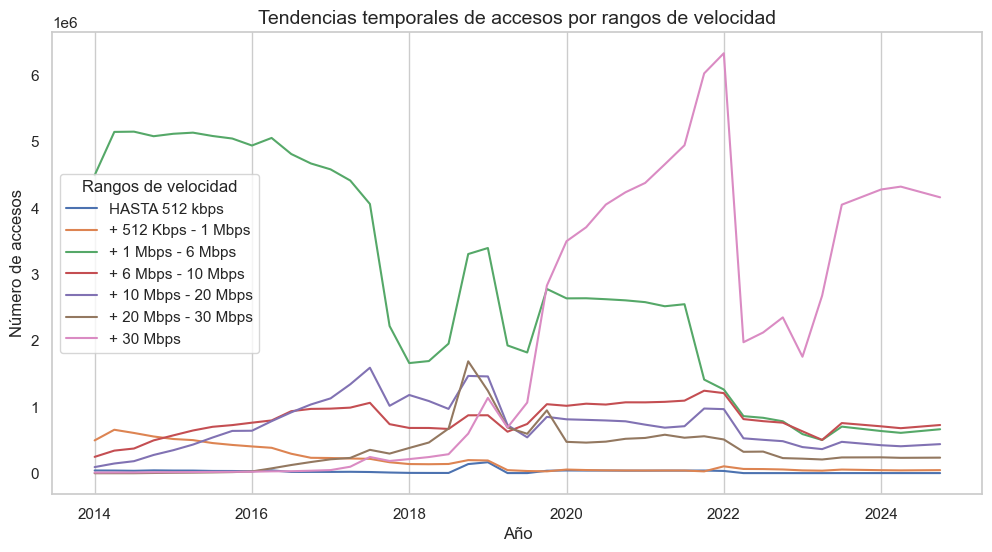

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")

# Agrupo los datos por Año y Trimestre, sumando los valores
temporal_data = df.groupby(['Año', 'Trimestre']).sum().reset_index()

# Para crear el gráfico de líneas
plt.figure(figsize=(12, 6))
for column in df.columns[3:-2]:  #Excluyo columnas no numéricas ni totales
    sns.lineplot(
        data=temporal_data,
        x=temporal_data['Año'] + (temporal_data['Trimestre'] - 1) / 4,  #Convierto los trimestres en fracción de año
        y=column,
        label=column
    )
plt.title("Tendencias temporales de accesos por rangos de velocidad", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de accesos", fontsize=12)
plt.legend(title="Rangos de velocidad")
plt.grid(axis='y')
plt.show()

*Observaciones:*

*Los accesos 'HASTA 512 kbps' se mantuvieron constantes durante toda la decada.*

*'+ 1 a 6 Mbps' fue siendo reemplazada por '+ 30 Mbps' a partir de fines del 2019.*

*Los accesos con respecto a el resto de las velocidades, salvo algunos vaivenes, se mantuvieron prácticamente constantes.* 

Variación de los accesos segun las velocidades y provincias 

<Figure size 1400x800 with 0 Axes>

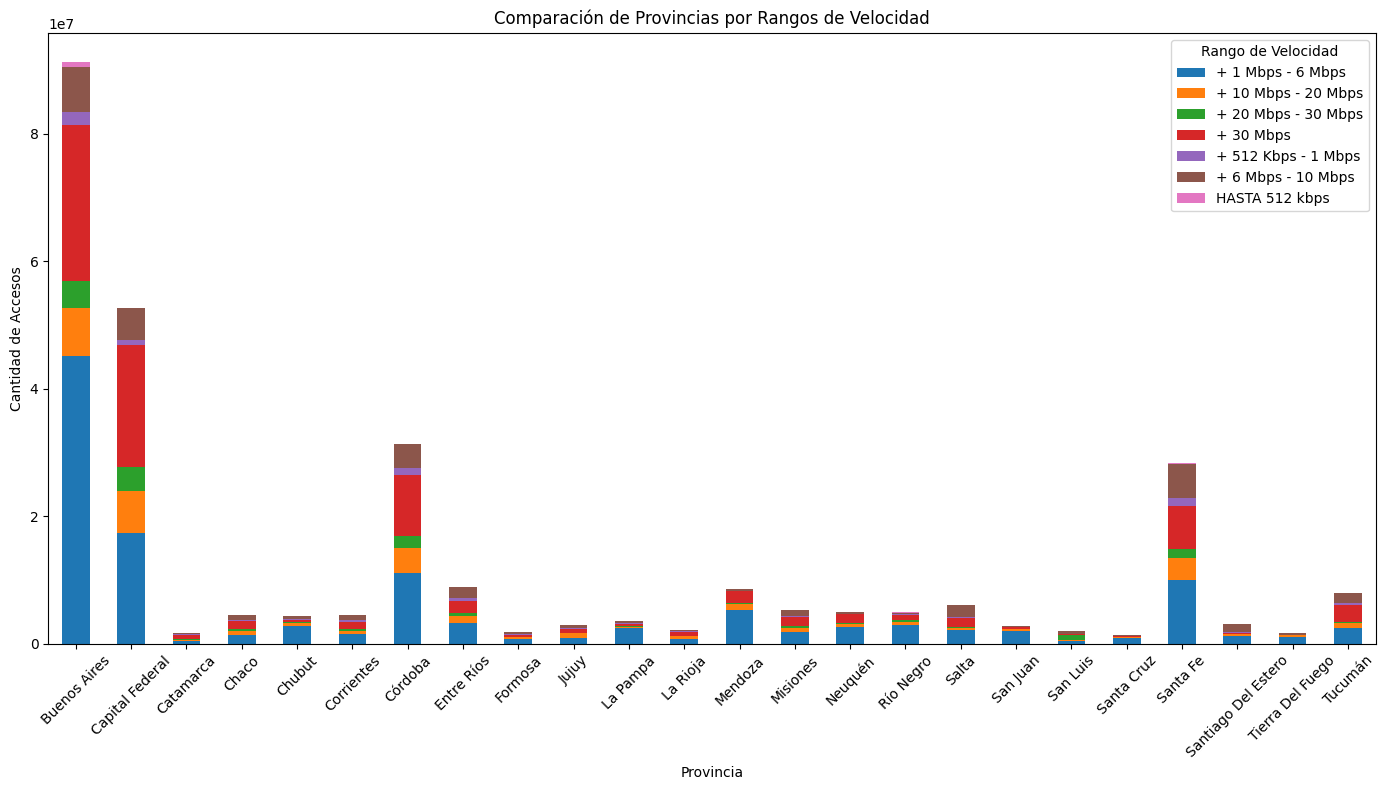

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizo el dataframe para la visualización de barras apiladas
df_stacked = df.melt(id_vars=['Año', 'Provincia'], value_vars=['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps'], var_name='Rango de Velocidad', value_name='Accesos')

# Elimino filas con valores nulos
df_stacked = df_stacked.dropna(subset=['Accesos'])

# Creo un gráfico de barras apiladas
plt.figure(figsize=(14, 8))

# Creo barras apiladas utilizando pandas pivot table
df_pivot = df_stacked.pivot_table(index='Provincia', columns='Rango de Velocidad', values='Accesos', aggfunc='sum')
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))

# Ajusto el gráfico
plt.title('Comparación de Provincias por Rangos de Velocidad')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=45)
plt.legend(title='Rango de Velocidad')
plt.tight_layout()

plt.show()



*El rango '+ 1 Mbps - 6 Mbps' parece ser el más común en la mayoría de las provincias, dado que ocupa la mayor proporción de las barras.*

*Velocidades más altas, como '+ 20 Mbps - 30 Mbps' o '+ 30 Mbps', tienen menor representación, lo que sugiere que el acceso a velocidades altas es limitado en general.*